# Logistic Regression Method

In [6]:
# import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, roc_curve

In [2]:
###load data first
features = np.loadtxt("features.txt", delimiter=",")
labels = np.loadtxt("labels.txt", delimiter=",")
X = features
Y = labels
Y = np.array([labels, -(labels-1)]).T 
# normalize
X = (X - X.min(0)) / X.ptp(0)

x_train, x_test, y_train, y_test = train_test_split(X, Y)

print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

x_train shape: (3587, 244)
y_train shape: (3587, 2)
x_test shape: (1196, 244)
y_test shape: (1196, 2)


Epoch: 0002 cost= 0.657871870
Epoch: 0004 cost= 0.654839732
Epoch: 0006 cost= 0.652221239
Epoch: 0008 cost= 0.649983055
Epoch: 0010 cost= 0.648068523
Epoch: 0012 cost= 0.646429513
Epoch: 0014 cost= 0.645025199
Epoch: 0016 cost= 0.643820892
Epoch: 0018 cost= 0.642787130
Epoch: 0020 cost= 0.641898850
Epoch: 0022 cost= 0.641134756
Epoch: 0024 cost= 0.640476683
Epoch: 0026 cost= 0.639909191
Epoch: 0028 cost= 0.639419132
Epoch: 0030 cost= 0.638995281
Epoch: 0032 cost= 0.638628081
Epoch: 0034 cost= 0.638309371
Epoch: 0036 cost= 0.638032178
Epoch: 0038 cost= 0.637790551
Epoch: 0040 cost= 0.637579436
Epoch: 0042 cost= 0.637394456
Epoch: 0044 cost= 0.637231929
Epoch: 0046 cost= 0.637088668
Epoch: 0048 cost= 0.636961968
Epoch: 0050 cost= 0.636849494
Epoch: 0052 cost= 0.636749262
Epoch: 0054 cost= 0.636659563
Epoch: 0056 cost= 0.636578940
Epoch: 0058 cost= 0.636506147
Epoch: 0060 cost= 0.636440095
Epoch: 0062 cost= 0.636379892
Epoch: 0064 cost= 0.636324711
Epoch: 0066 cost= 0.636273915
Epoch: 006

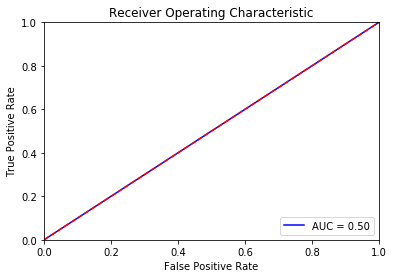

In [7]:
# Parameters
learning_rate = 0.002
training_epochs = 200
batch_size = 100
display_step = 2

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 244]) # 244 features 
y = tf.placeholder(tf.float32, [None, 2]) # 2 classes

# Set model weights
W = tf.Variable(tf.zeros([244, 2]))
b = tf.Variable(tf.zeros([2]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
beta = 0.5
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

# cost function using L2 Regularization
regularizer = tf.nn.l2_loss(W)
cost = tf.reduce_mean(cost + beta * regularizer)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start training
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(x_train)/batch_size)
        X_batches = np.array_split(x_train, total_batch)
        Y_batches = np.array_split(y_train, total_batch)
        # Loop over all batches
        for i in range(total_batch):

            #batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            batch_xs, batch_ys = X_batches[i], Y_batches[i]
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Training Accuracy:", accuracy.eval({x: x_train, y: y_train}))
    print("Testing Accuracy:", accuracy.eval({x: x_test, y: y_test}))
    global result 
    result = tf.argmax(pred, 1).eval({x: x_test, y: y_test})
    result = np.array(result)
    #confusion matrix
    con_mat = confusion_matrix(y_test[:,1], result)
    print("Confusion Matrix is: ", con_mat)
    
    #ROC curve
    fpr, tpr, threshold = roc_curve(y_test[:,1], result)
    roc_auc = auc(fpr, tpr)

    # method I: plt

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()